In [2]:
import pandas as pd
import seaborn as sns

In [8]:
teams = pd.read_csv("C:\\Samhitha\\Olympics-ML project\\Olympics-Atlete\\teams.csv")

In [9]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [12]:
teams = teams[['team','year','country','athletes','age','medals','prev_medals']]

In [13]:
teams.corr()['medals']

C:\Users\samhi\AppData\Local\Temp\ipykernel_43532\801081661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.021603
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

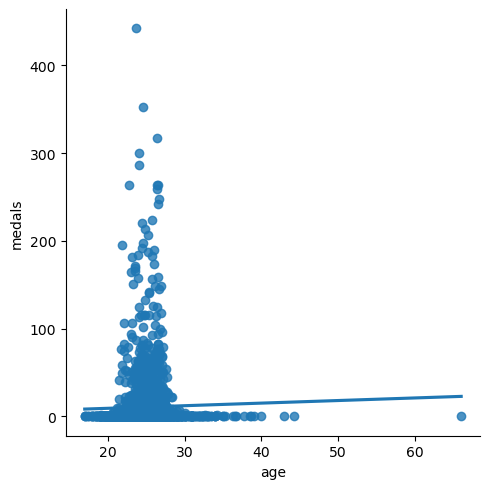

In [15]:
sns.lmplot(x='age',y='medals',data=teams,fit_reg=True,ci=False)
# checking regression line for age which is least correlated to medals 

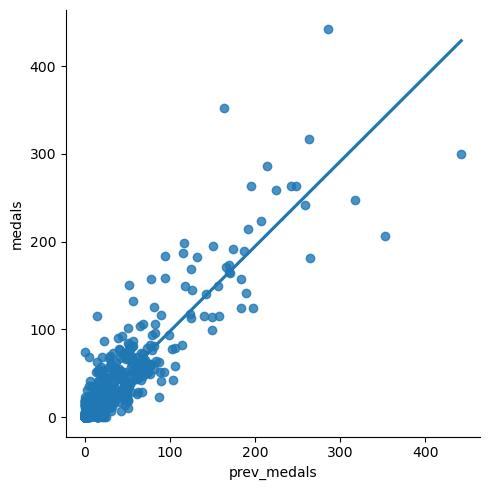

In [18]:
sns.lmplot(x='prev_medals',y='medals',data=teams,fit_reg=True,ci=False)
# regression between highly correlated variables, medals and prev_medals

<Axes: ylabel='Frequency'>

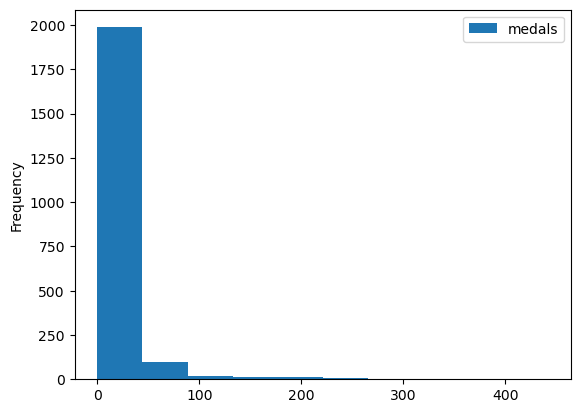

In [21]:
teams.plot.hist(y='medals')

In [32]:
teams[teams.isnull().any(axis=1)]

,team,year,country,athletes,age,medals,prev_medals
19,ALB,1992,Albania,9,25.3,0,NaN
26,ALG,1964,Algeria,7,26.0,0,NaN
39,AND,1976,Andorra,3,28.3,0,NaN
50,ANG,1980,Angola,17,17.4,0,NaN
59,ANT,1976,Antigua and Barbuda,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,1988,Saint Vincent and the Grenadines,6,20.5,0,NaN
2103,YAR,1984,North Yemen,3,27.7,0,NaN
2105,YEM,1992,Yemen,8,19.6,0,NaN
2112,YMD,1988,South Yemen,5,23.6,0,NaN


In [54]:
teams = teams.dropna()

In [102]:
train = teams[teams['year']< 2012].copy()
test = teams[teams['year']>=2012].copy()

In [103]:
train.shape

(1609, 7)

In [104]:
test.shape

(405, 7)

In [105]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [106]:
reg.fit(train[['athletes','prev_medals']],train['medals'])

LinearRegression()

In [150]:
predictions=reg.predict(test[['athletes','prev_medals']])
#predictions has negative values,so we need to round it and remove rows which has negative values as medals cannot be negative or decimal
predictions[1:10]

array([-1.17633261, -1.42503158, -1.71184673,  2.15562926,  3.91463636,
       -1.71184673, -1.85525431,  0.36756313, -0.27777097])

In [108]:
test['predictions'] = predictions
test
#Adding the predictions as a column

,team,year,country,athletes,age,medals,prev_medals,predictions
6,AFG,2012,Afghanistan,6,24.8,1,1.0,-0.961221
7,AFG,2016,Afghanistan,3,24.7,0,1.0,-1.176333
24,ALB,2012,Albania,10,25.7,0,0.0,-1.425032
25,ALB,2016,Albania,6,23.7,0,0.0,-1.711847
37,ALG,2012,Algeria,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,2016,Yemen,3,19.3,0,0.0,-1.926958
2131,ZAM,2012,Zambia,7,22.6,0,0.0,-1.640143
2132,ZAM,2016,Zambia,7,24.1,0,0.0,-1.640143
2142,ZIM,2012,Zimbabwe,9,27.3,0,4.0,1.505767


In [109]:
test.loc[test['predictions']<0, 'predictions'] = 0
#replacing non-zero values with zero

In [110]:
test['predictions'] = test['predictions'].round()
#rounding the values

In [111]:
test

,team,year,country,athletes,age,medals,prev_medals,predictions
6,AFG,2012,Afghanistan,6,24.8,1,1.0,0.0
7,AFG,2016,Afghanistan,3,24.7,0,1.0,0.0
24,ALB,2012,Albania,10,25.7,0,0.0,0.0
25,ALB,2016,Albania,6,23.7,0,0.0,0.0
37,ALG,2012,Algeria,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,2016,Yemen,3,19.3,0,0.0,0.0
2131,ZAM,2012,Zambia,7,22.6,0,0.0,0.0
2132,ZAM,2016,Zambia,7,24.1,0,0.0,0.0
2142,ZIM,2012,Zimbabwe,9,27.3,0,4.0,2.0


In [112]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'],test['predictions'])
error

3.2987654320987656

In [113]:
teams.describe()['medals']
#It is considered a good prediction if the error is less than std

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [114]:
test[test['team']=='IND']

,team,year,country,athletes,age,medals,prev_medals,predictions
907,IND,2012,India,95,26.0,6,3.0,7.0
908,IND,2016,India,130,26.1,2,6.0,12.0


In [120]:
errors = (test['medals'] - test['predictions']).abs()

In [131]:
errors_by_team = errors.groupby(test['team']).mean()
#errors by each team from predicted to actual

In [132]:
errors_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [133]:
medals_by_team = test['medals'].groupby(test['team']).mean()

In [134]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [144]:
errors_ratio = (errors_by_team/medals_by_team).abs()
errors_ratio
#

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [145]:
errors_ratio[~pd.isnull(errors_ratio)]
#We are removing NaN, as there are certain teams with 0 medals which is why we have NaN(0/0) as the ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [153]:
import numpy as np
errors_ratio = errors_ratio[np.isfinite(errors_ratio)]
#Removing infite values (anything/0)

<Axes: ylabel='Frequency'>

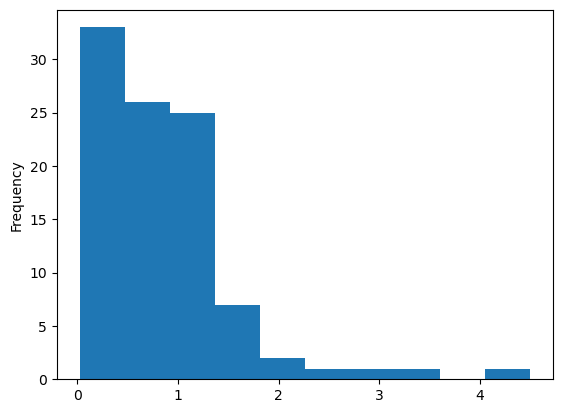

In [154]:
errors_ratio.plot.hist(y='errors_ratio')
'''We understood that if more medals are won by a country their error_ratio will be lesser as there are more people
competing , so error_ratio above 1 or 2 has more errors and variations in predictions'''